p: The lag order, representing the number of lag observations incorporated in the model.
d: Degree of differencing, denoting the number of times raw observations undergo differencing.
q: Order of moving average, indicating the size of the moving average window.

In [355]:
# fit an ARIMA model and plot residual errors
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv('../DATA/data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [356]:
data['sunrise'] = data['sunrise'].str.replace(r'[0-9]+-[0-9]+-[0-9]+T', '', regex=True)

In [357]:
data['sunrise'] = pd.to_datetime(data['sunrise'], format = '%H:%M')
data['sunrise'] = data['sunrise'].apply(lambda x: x.value)/10**9\12

# Min Temp

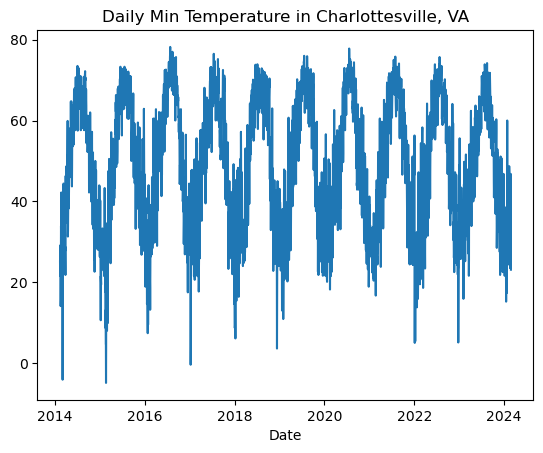

In [358]:
# Plot the time series
plt.plot(data['min_temp'])
plt.title('Daily Min Temperature in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

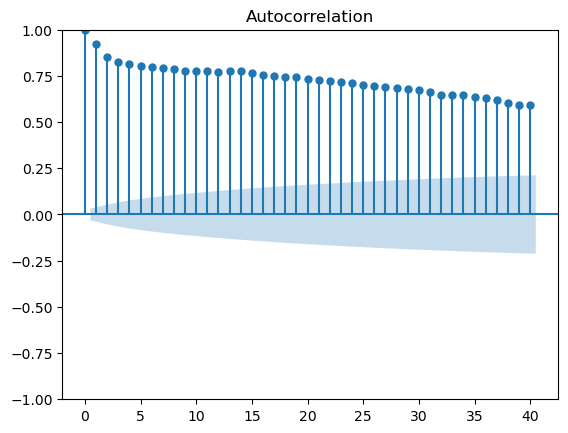

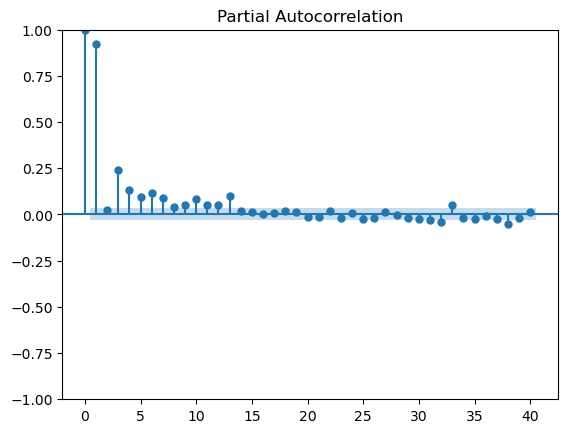

In [359]:
# finding parameters
plot_acf(data['min_temp'], lags=40)
plot_pacf(data['min_temp'], lags=40)
plt.show()

In [360]:
# building the ARIMA model
model = ARIMA(data['min_temp'], order=(2, 0, 0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [361]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


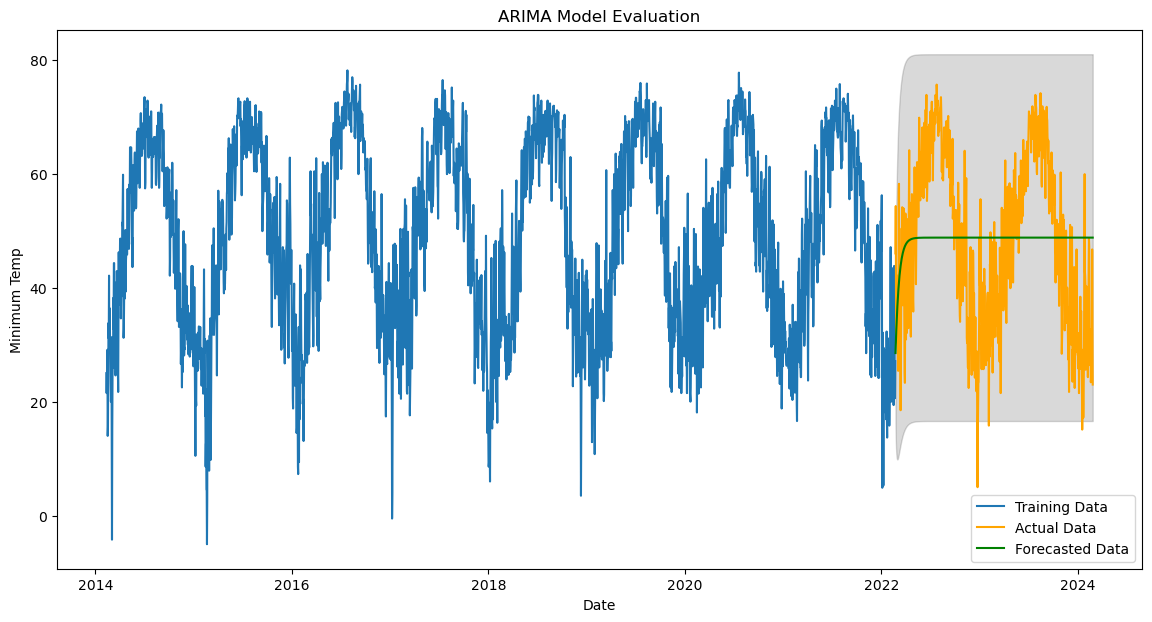

RMSE: 14.793841091996308


In [362]:
# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['min_temp'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['min_temp'], test_forecast_series)
min_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['min_temp'], label='Training Data')
plt.plot(test['min_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Minimum Temp')
plt.legend()
plt.show()

print('RMSE:', min_temp_rmse)

# Mean Temp

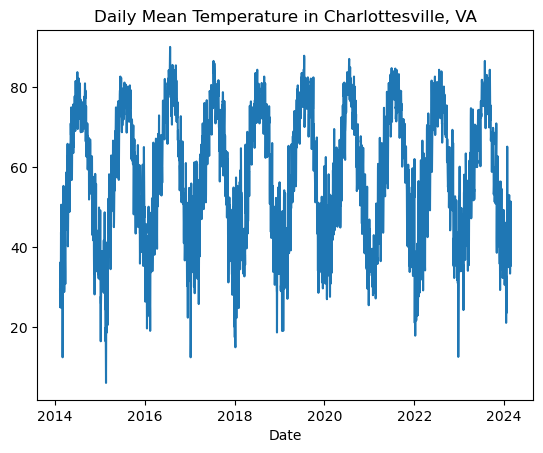

In [363]:
# Plot the time series
plt.plot(data['mean_temp'])
plt.title('Daily Mean Temperature in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

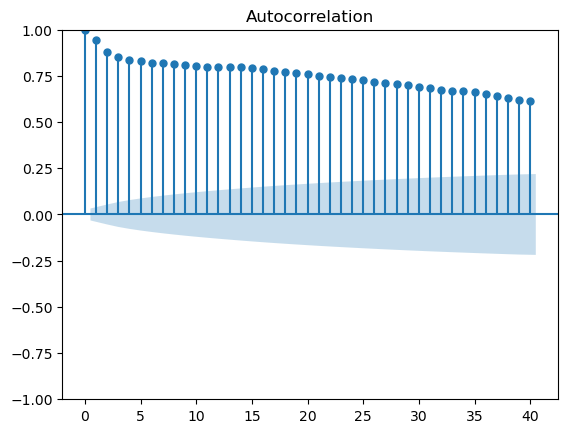

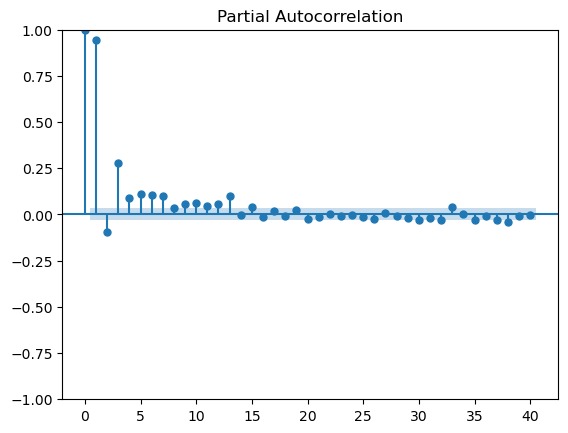

In [364]:
# finding parameters

plot_acf(data['mean_temp'], lags=40)
plot_pacf(data['mean_temp'], lags=40)
plt.show()

In [365]:
# building the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['mean_temp'], order=(2,0,0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [366]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


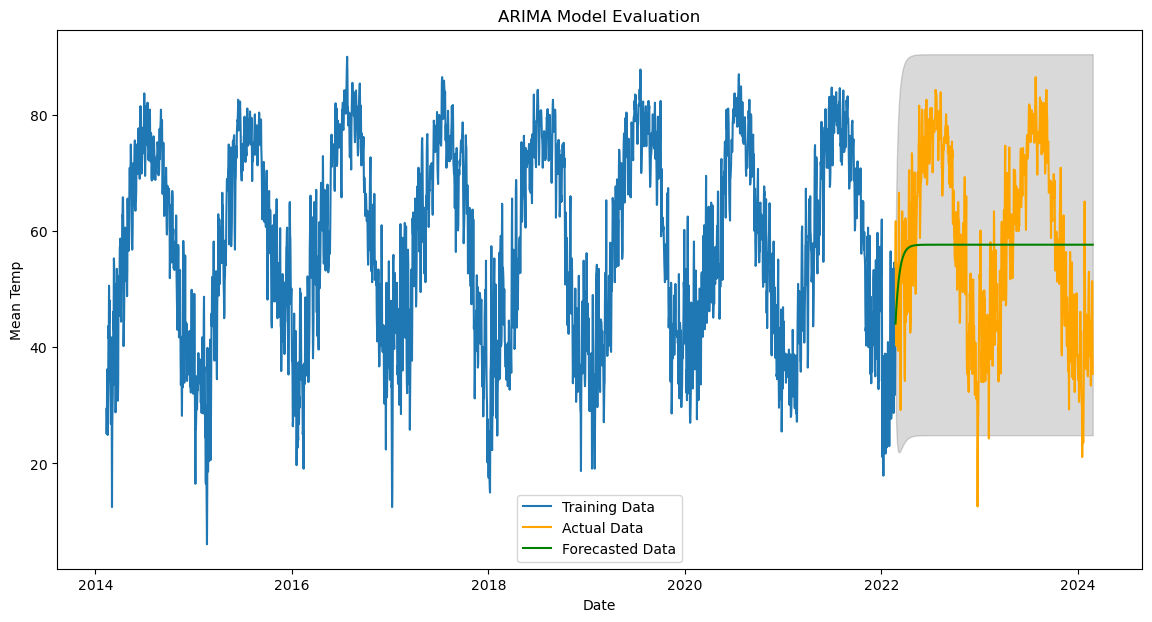

RMSE: 15.290804790376225


In [367]:
# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['mean_temp'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['mean_temp'], test_forecast_series)
mean_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['mean_temp'], label='Training Data')
plt.plot(test['mean_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.legend()
plt.show()

print('RMSE:', mean_temp_rmse)

# Max Temp

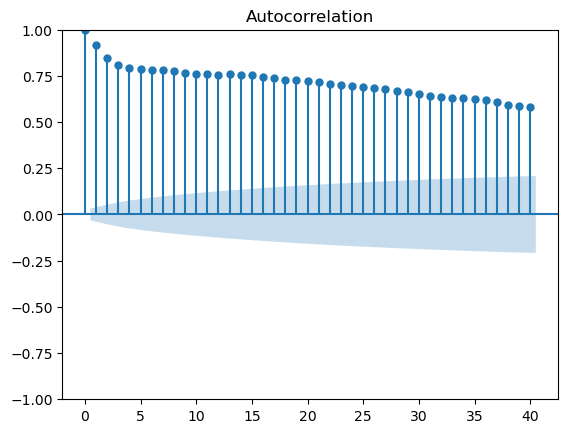

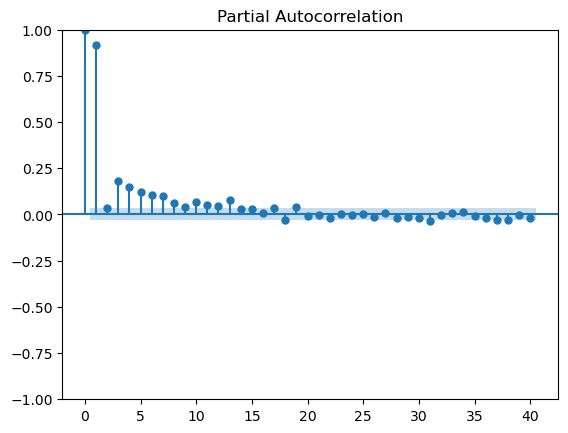

In [368]:
plot_acf(data['max_temp'], lags=40)
plot_pacf(data['max_temp'], lags=40)
plt.show()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packag

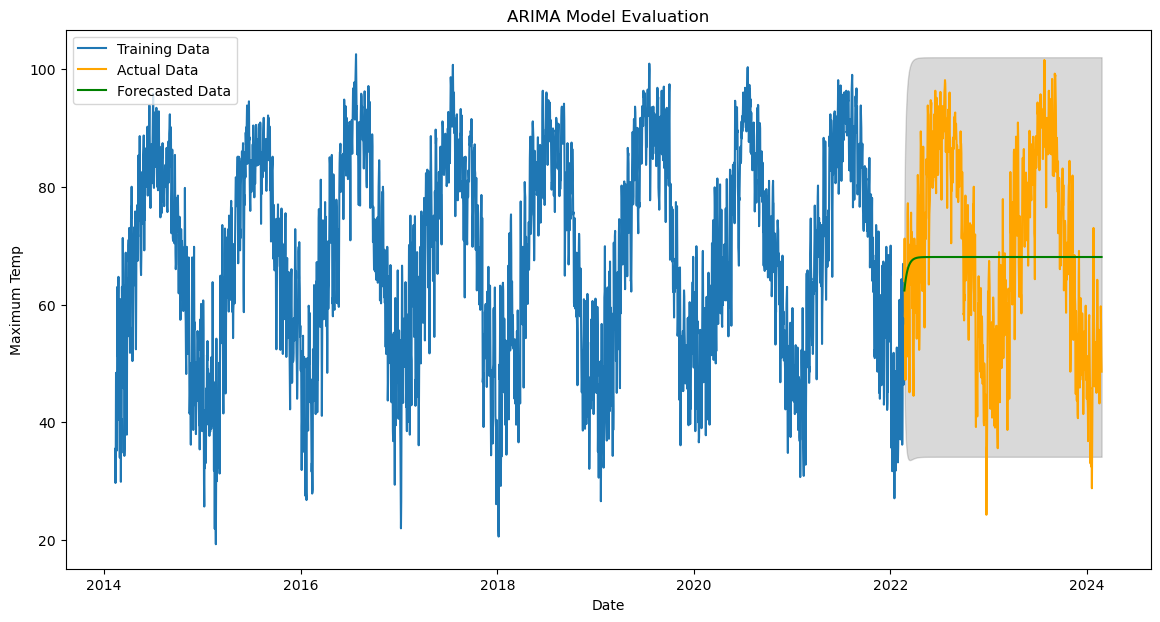

RMSE: 24.309616596421474


In [369]:
# building the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['max_temp'], order=(2,0,0))
model_fit = model.fit()

# training and forecast
forecast = model_fit.get_forecast(steps=30)

# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['max_temp'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['min_temp'], test_forecast_series)
max_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['max_temp'], label='Training Data')
plt.plot(test['max_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Maximum Temp')
plt.legend()
plt.show()

print('RMSE:', max_temp_rmse)

# Sunrise

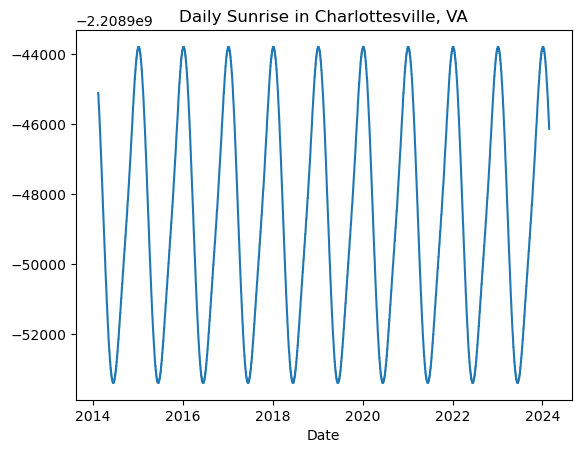

In [370]:
# Plot the time series
plt.plot(data['sunrise'])
plt.title('Daily Sunrise in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

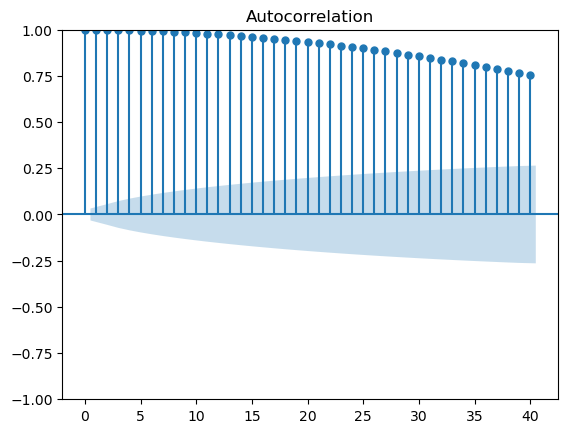

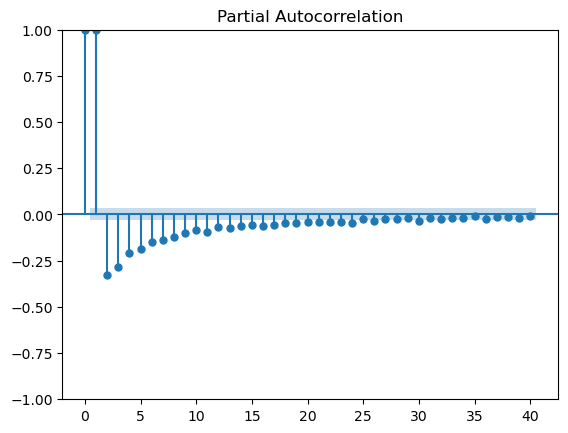

In [371]:
# finding parameters
plot_acf(data['sunrise'], lags=40)
plot_pacf(data['sunrise'], lags=40)
plt.show()

In [372]:
# building the ARIMA model
model = ARIMA(data['sunrise'], order=(1,0,1))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


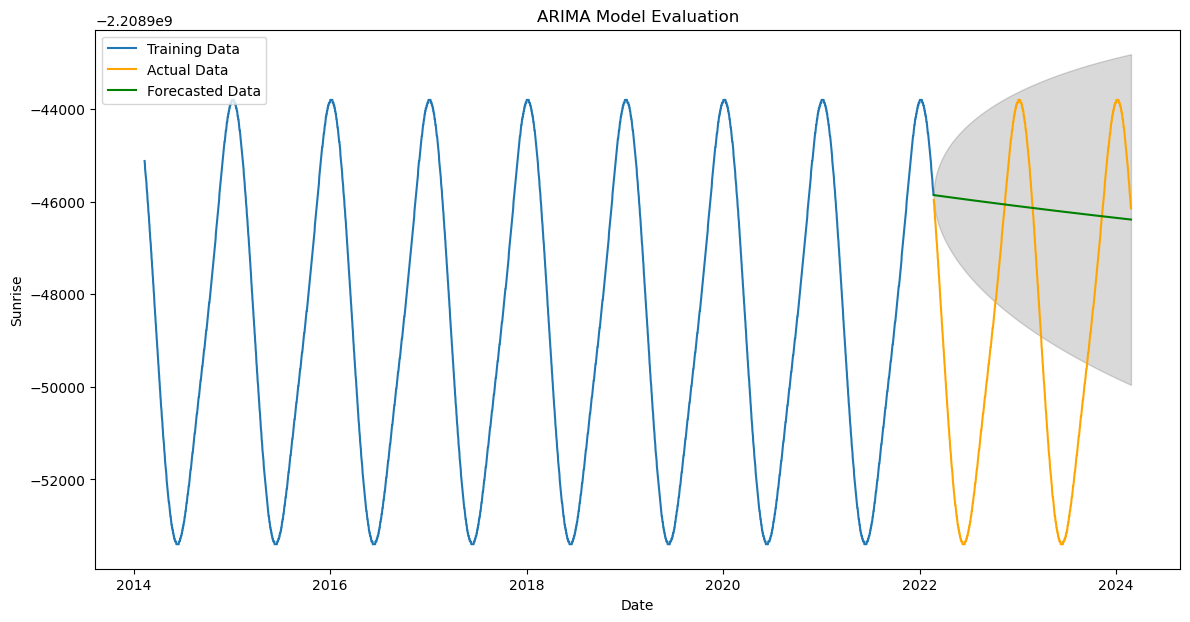

RMSE: 4194.968880527637


In [373]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['sunrise'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['sunrise'], test_forecast_series)
sunrise_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['sunrise'], label='Training Data')
plt.plot(test['sunrise'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Sunrise')
plt.legend()
plt.show()

print('RMSE:', sunrise_rmse)

# Total Precipitation

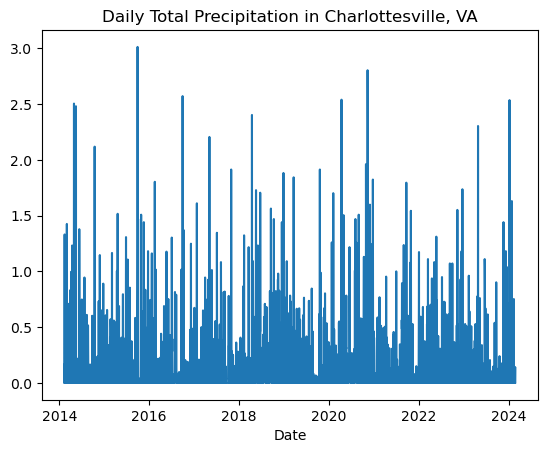

In [374]:
# Plot the time series
plt.plot(data['total_precip'])
plt.title('Daily Total Precipitation in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

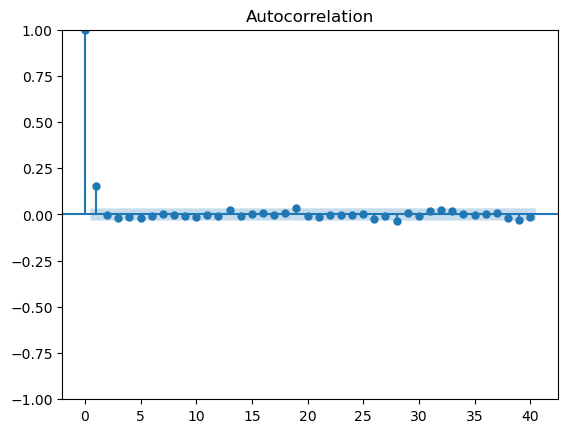

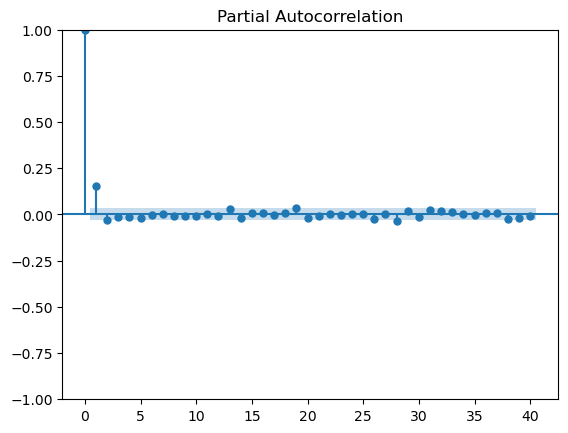

In [375]:
# finding parameters
plot_acf(data['total_precip'], lags=40)
plot_pacf(data['total_precip'], lags=40)
plt.show()

In [376]:
# building the ARIMA model
model = ARIMA(data['total_precip'], order=(2,0,0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [377]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


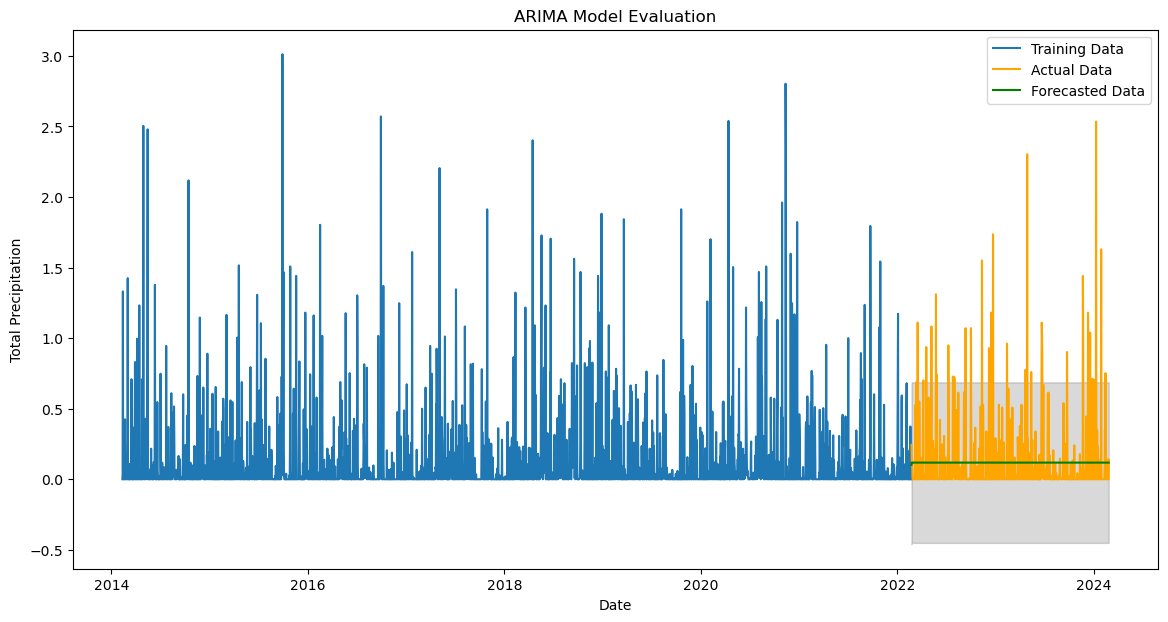

RMSE: 0.2674821225946826


In [378]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['total_precip'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_precip'], test_forecast_series)
total_precip_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_precip'], label='Training Data')
plt.plot(test['total_precip'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

print('RMSE:', total_precip_rmse)

# Snow

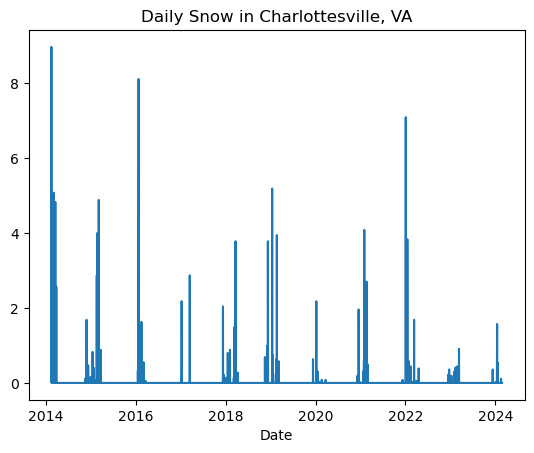

In [379]:
# Plot the time series
plt.plot(data['snow'])
plt.title('Daily Snow in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

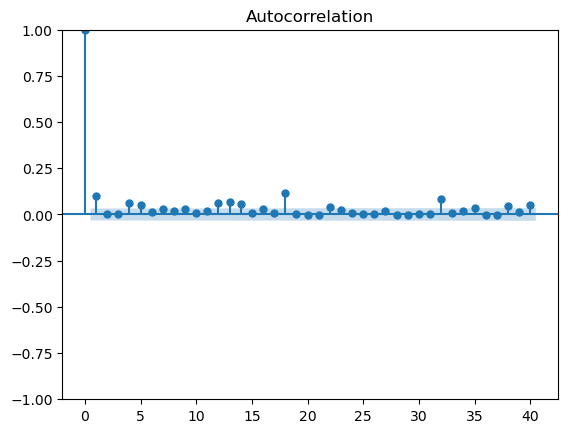

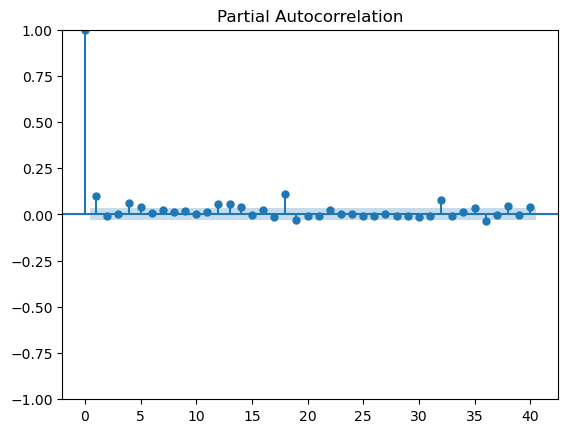

In [380]:
# finding parameters
plot_acf(data['snow'], lags=40)
plot_pacf(data['snow'], lags=40)
plt.show()

In [381]:
# building the ARIMA model
model = ARIMA(data['snow'], order=(1,0,0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [382]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


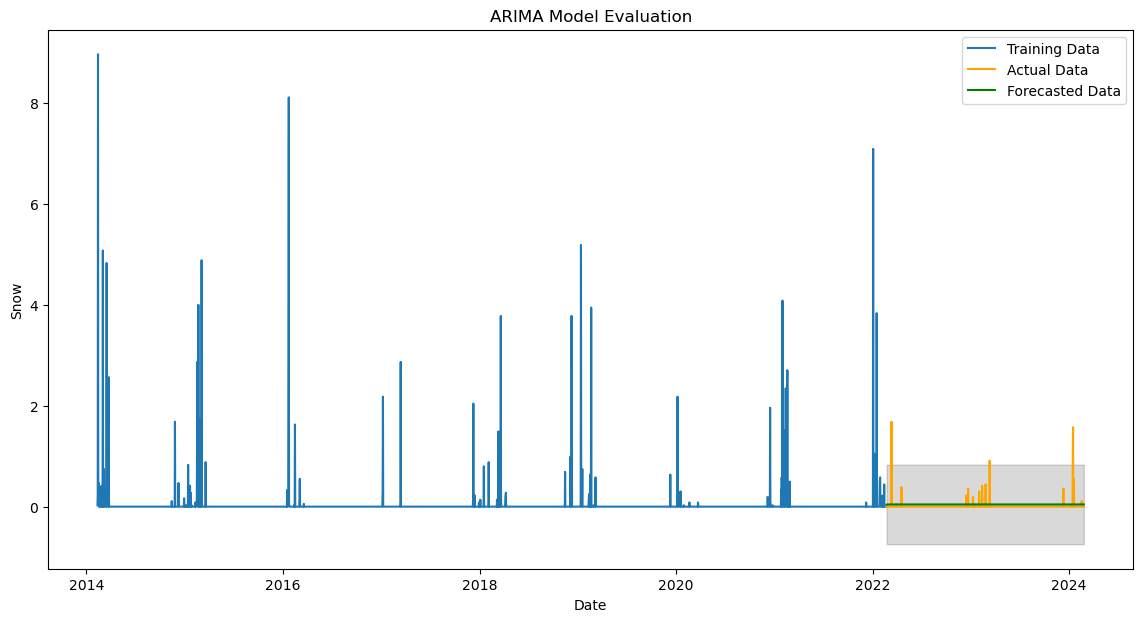

RMSE: 0.11181008255330668


In [383]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['snow'], order=(1, 0, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['snow'], test_forecast_series)
snow_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['snow'], label='Training Data')
plt.plot(test['snow'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Snow')
plt.legend()
plt.show()

print('RMSE:', snow_rmse)

# Hours of Precipitation

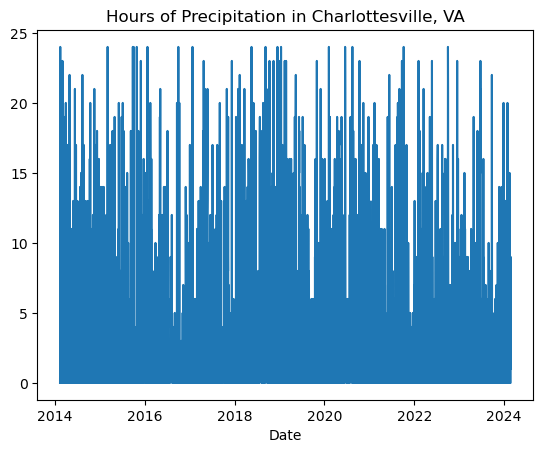

In [384]:
# Plot the time series
plt.plot(data['precip_hours'])
plt.title('Hours of Precipitation in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

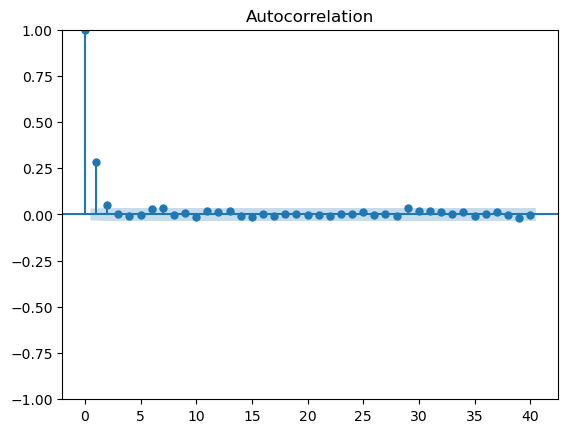

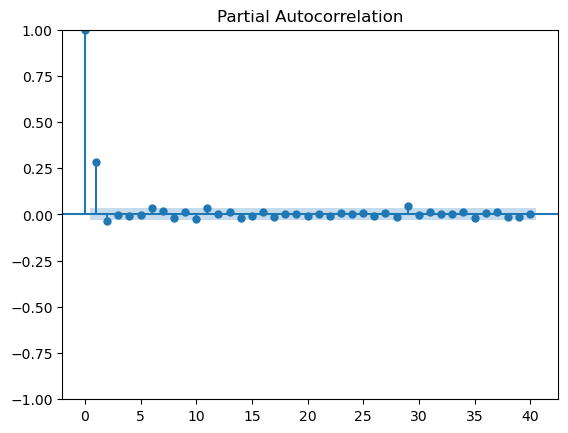

In [385]:
# finding parameters
plot_acf(data['precip_hours'], lags=40)
plot_pacf(data['precip_hours'], lags=40)
plt.show()

In [386]:
# building the ARIMA model
model = ARIMA(data['precip_hours'], order=(2,0,0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [387]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


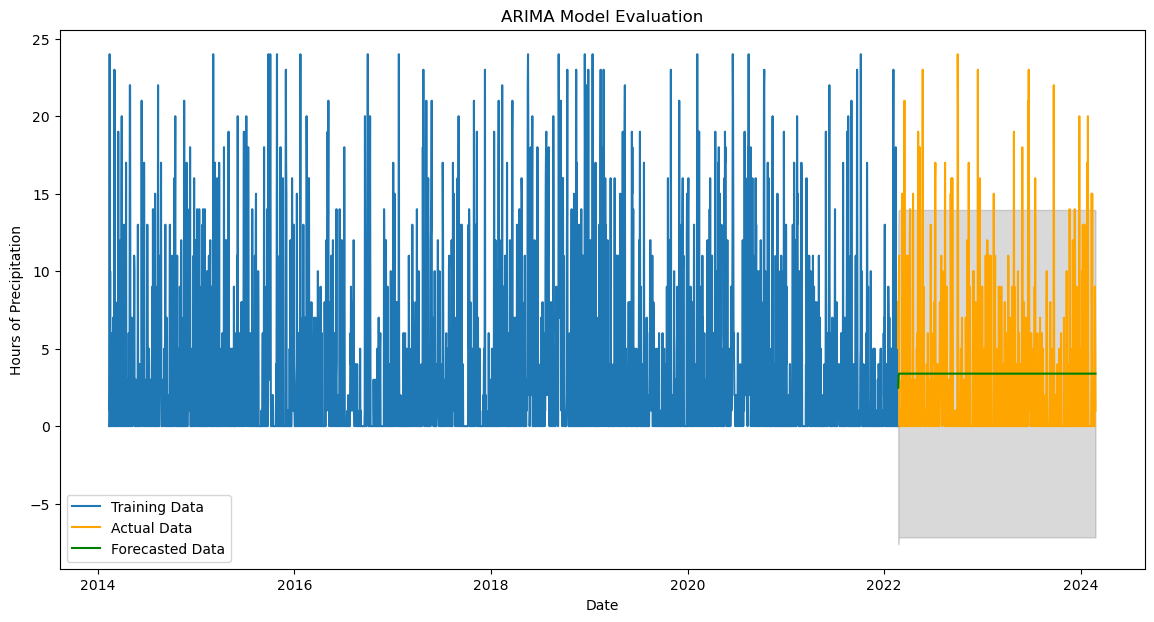

RMSE: 4.58204077747987


In [388]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['precip_hours'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['precip_hours'], test_forecast_series)
precip_hours_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['precip_hours'], label='Training Data')
plt.plot(test['precip_hours'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Hours of Precipitation')
plt.legend()
plt.show()

print('RMSE:', precip_hours_rmse)

# Max wind

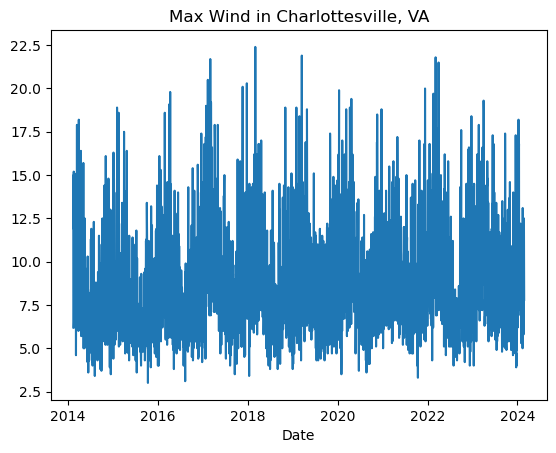

In [389]:
# Plot the time series
plt.plot(data['max_wind'])
plt.title('Max Wind in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

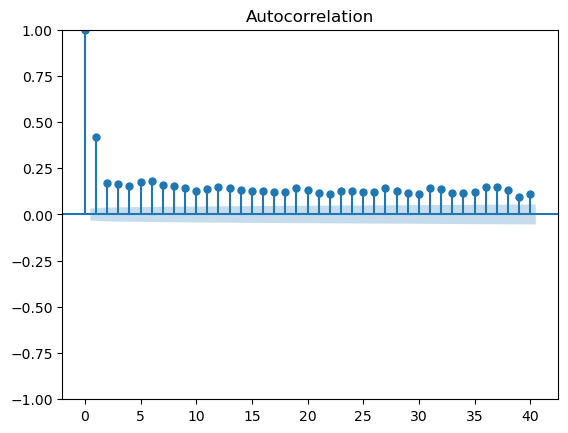

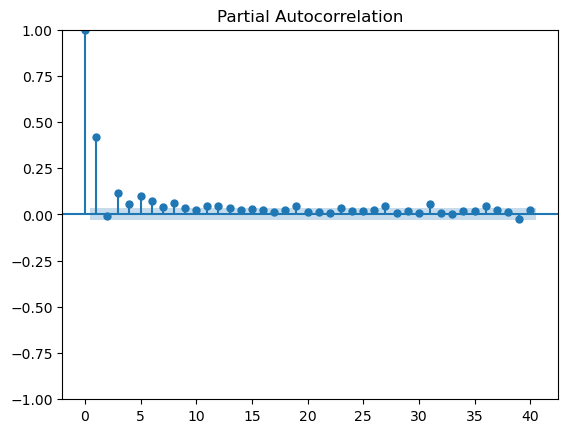

In [390]:
# finding parameters
plot_acf(data['max_wind'], lags=40)
plot_pacf(data['max_wind'], lags=40)
plt.show()

In [391]:
# building the ARIMA model
model = ARIMA(data['max_wind'], order=(2,0,0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [392]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


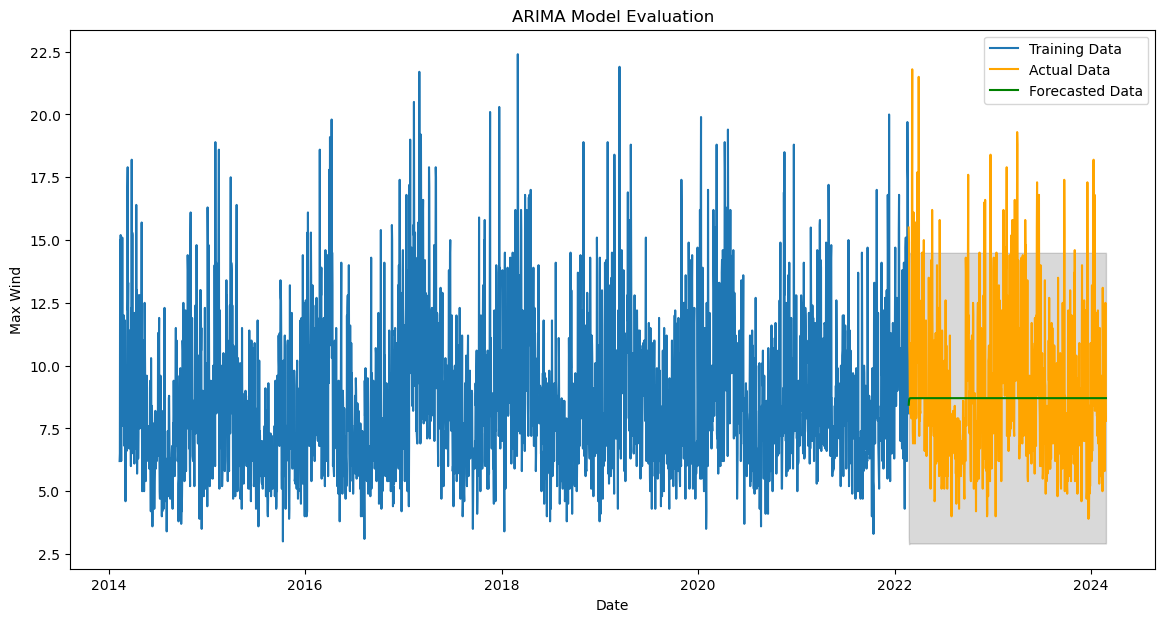

RMSE: 3.0177604628513506


In [393]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['max_wind'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['max_wind'], test_forecast_series)
max_wind_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['max_wind'], label='Training Data')
plt.plot(test['max_wind'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Max Wind')
plt.legend()
plt.show()

print('RMSE:', max_wind_rmse)

# Wind Direction Degrees

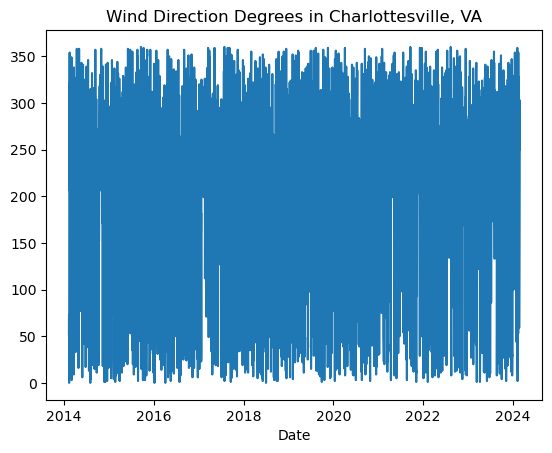

In [394]:
# Plot the time series
plt.plot(data['wind_direction_deg'])
plt.title('Wind Direction Degrees in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

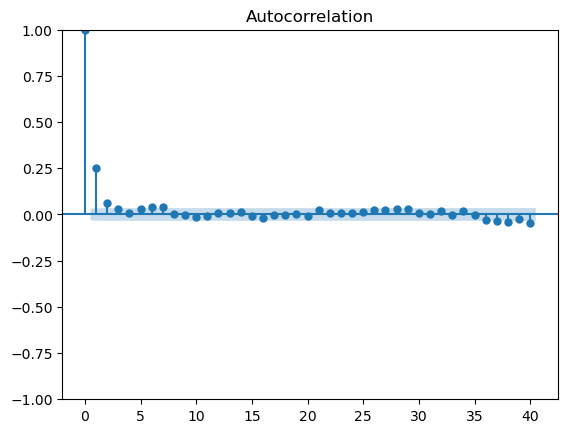

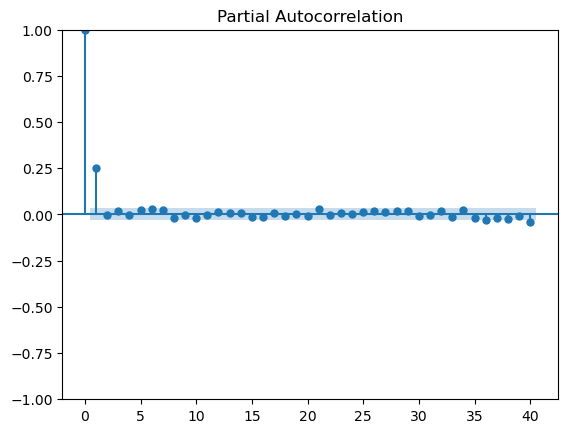

In [395]:
# finding parameters
plot_acf(data['wind_direction_deg'], lags=40)
plot_pacf(data['wind_direction_deg'], lags=40)
plt.show()

In [396]:
# building the ARIMA model
model = ARIMA(data['wind_direction_deg'], order=(2,0,0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [397]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


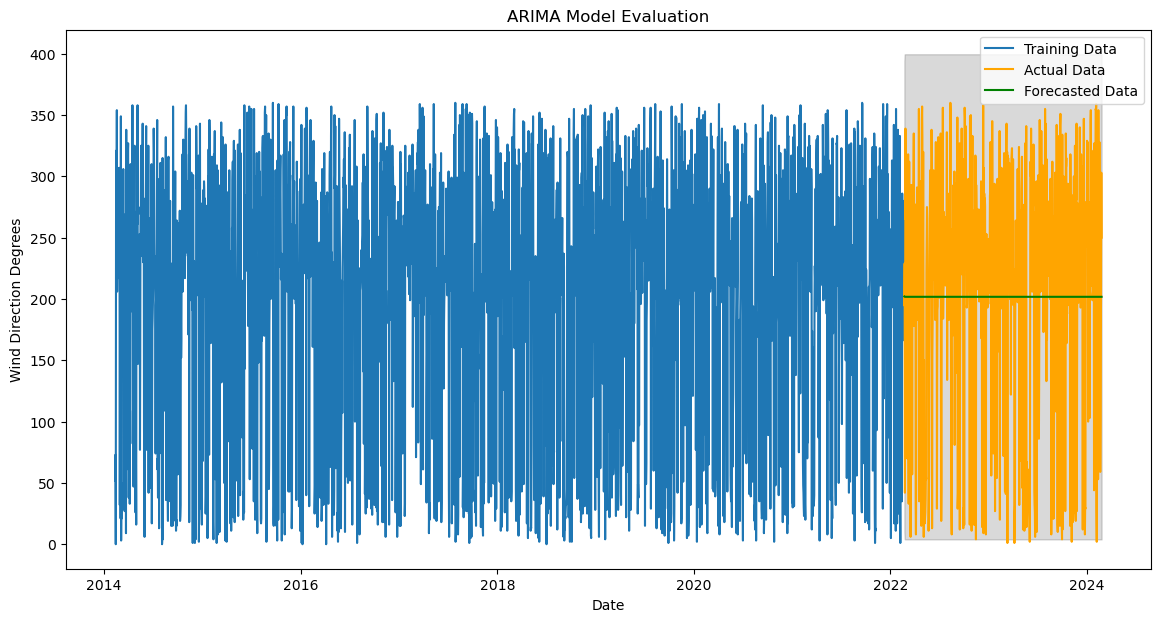

RMSE: 98.17984590450823


In [398]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['wind_direction_deg'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['wind_direction_deg'], test_forecast_series)
wind_direction_deg_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['wind_direction_deg'], label='Training Data')
plt.plot(test['wind_direction_deg'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Wind Direction Degrees')
plt.legend()
plt.show()


print('RMSE:', wind_direction_deg_rmse)

# Hours of Daylight

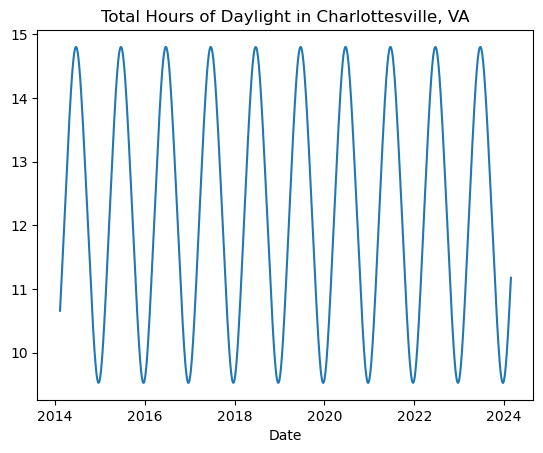

In [399]:
# Daylight Time Series
plt.plot(data['daylight'])
plt.title('Total Hours of Daylight in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

In [400]:
# ADF Fuller test: checking for stationarity
adf_test = adfuller(data['daylight'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -15.815469
p-value: 0.000000


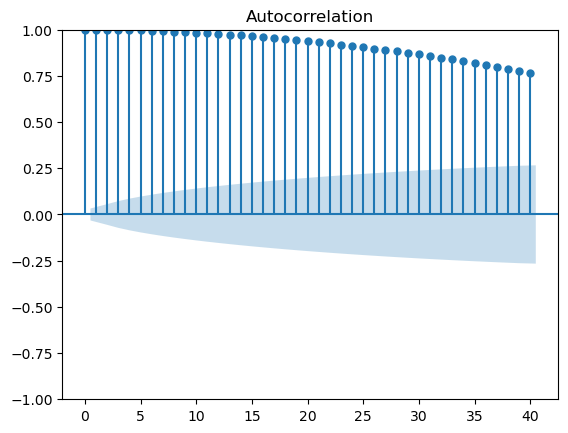

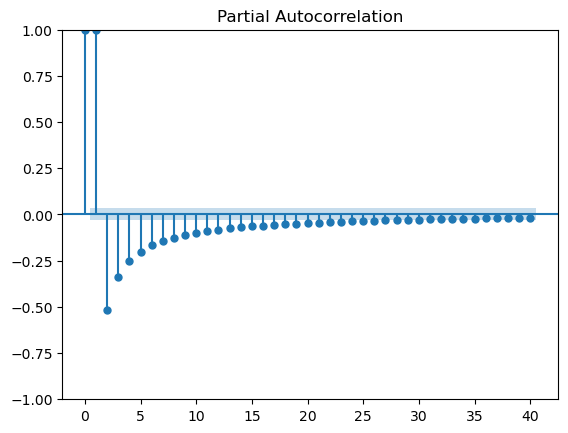

In [401]:
# Stationarity found: no need to difference it
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['daylight'], lags=40)
plot_pacf(data['daylight'], lags=40)
plt.show()

# Determining p, q, and d
ACF model decays gradually: indicates p,d,0 model


In [402]:
# Building the ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['daylight'], order=(1, 1, 0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [403]:
# Training and Forecasting
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


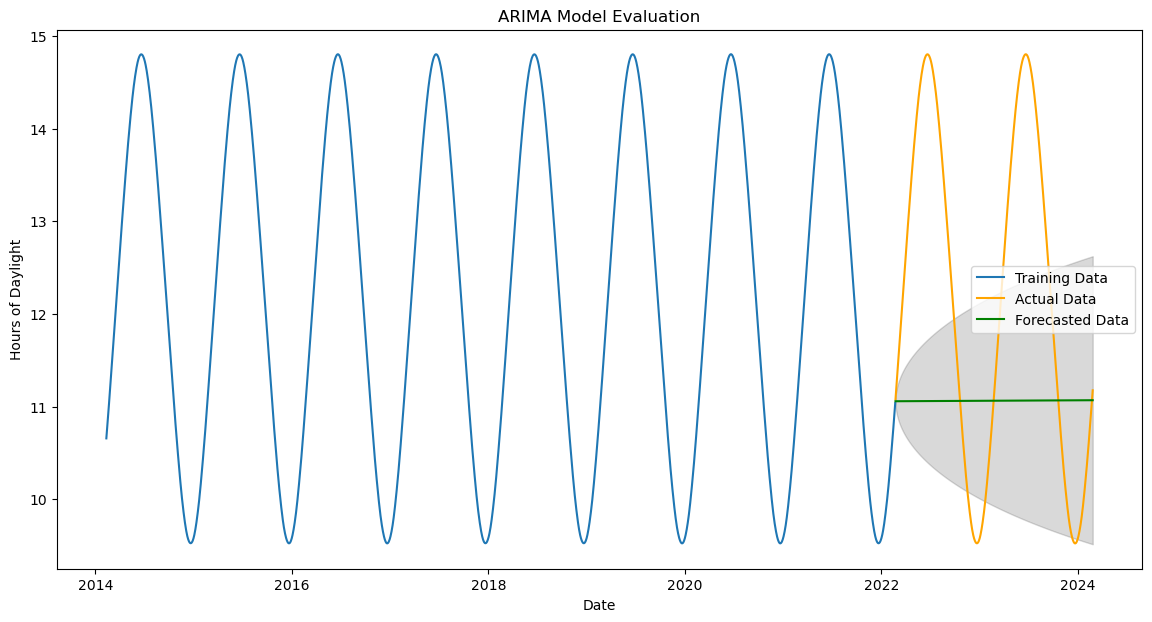

RMSE: 2.134534919629947


In [404]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['daylight'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['daylight'], test_forecast_series)
daylight_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['daylight'], label='Training Data')
plt.plot(test['daylight'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Hours of Daylight')
plt.legend()
plt.show()

print('RMSE:', daylight_rmse)

# Hours of Sunshine

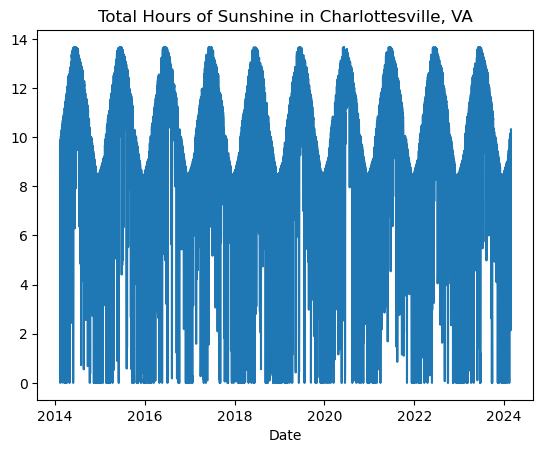

In [405]:
# Sunshine Time Series
plt.plot(data['sunshine'])
plt.title('Total Hours of Sunshine in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

In [406]:
# ADF Fuller test: checking for stationarity
adf_test = adfuller(data['sunshine'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.926624
p-value: 0.000031


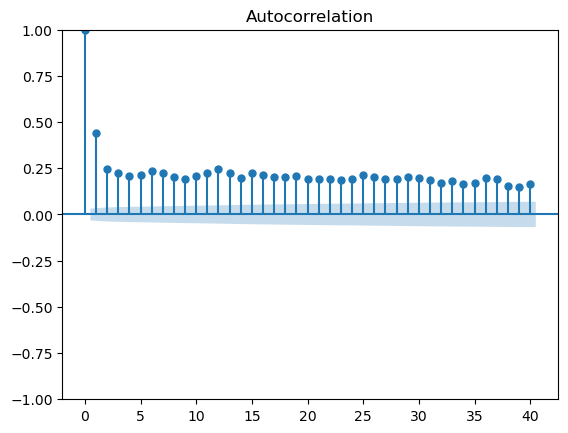

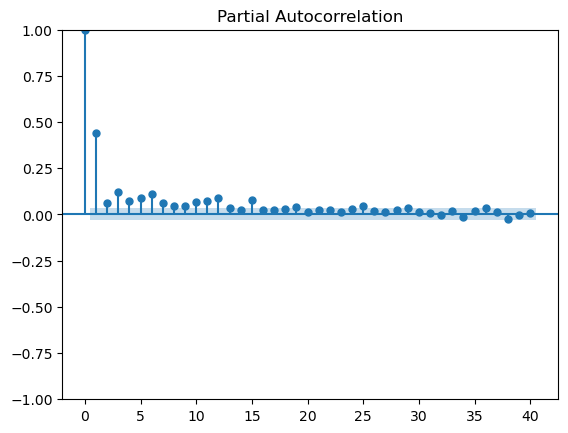

In [407]:
# Stationarity found: no need to difference it
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['sunshine'], lags=40)
plot_pacf(data['sunshine'], lags=40)
plt.show()

# Determining p, q, and d
ACF model decays gradually: indicates p,d,0 model
Lag 2 is closest to the dense part of the PACF graph, so our p is lag 1 (by doing n-1).
Order: (1,1,0)


# Building the ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['sunshine'], order=(1, 1, 0))
model_fit = model.fit()

In [408]:
# Training and Forecasting
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


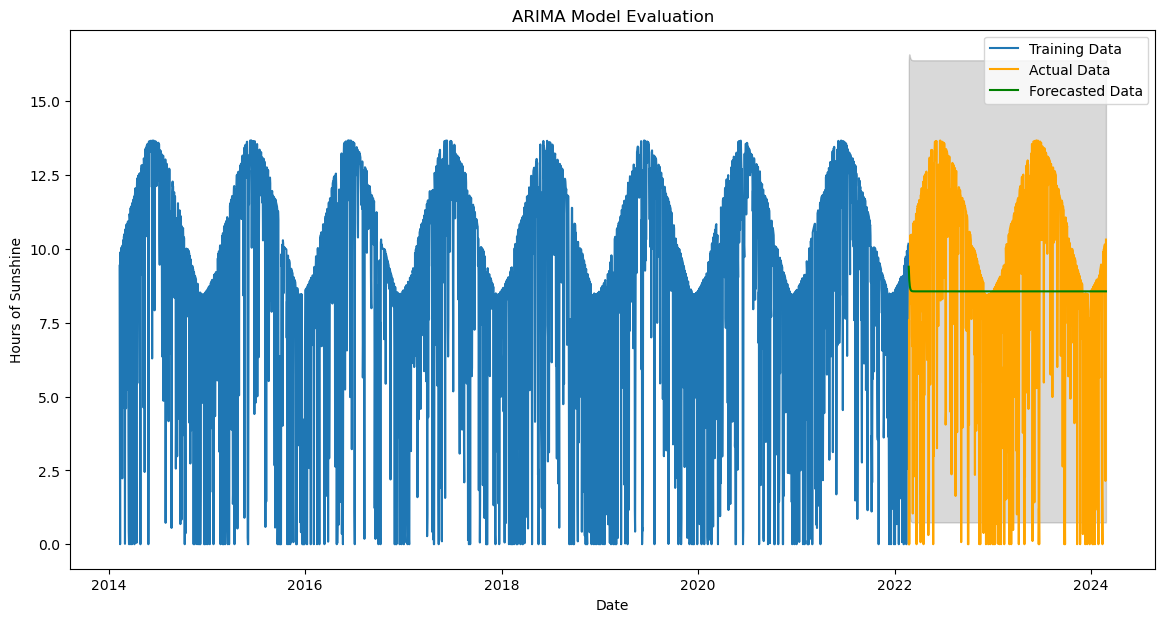

RMSE: 3.7472782152414146


In [409]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['sunshine'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['sunshine'], test_forecast_series)
sunshine_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['sunshine'], label='Training Data')
plt.plot(test['sunshine'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Hours of Sunshine')
plt.legend()
plt.show()

print('RMSE:', sunshine_rmse)

In [410]:
final = pd.DataFrame(['snow_rmse',
                'sunrise_rmse',
                'max_temp_rmse',
                'max_wind_rmse',
                'min_temp_rmse',
                'mean_temp_rmse',
                'precip_hours_rmse',
                'total_precip_rmse',
                'wind_direction_deg_rmse',
                'daylight_rmse',
                'sunshine_rmse'
])

final['RMSE'] = [
snow_rmse,
sunrise_rmse,
max_temp_rmse,
max_wind_rmse,
min_temp_rmse,
mean_temp_rmse,
precip_hours_rmse,
total_precip_rmse,
wind_direction_deg_rmse,
daylight_rmse,
sunshine_rmse]

final.columns = ['Variable', 'RMSE']
final.sort_values('RMSE')



,Variable,RMSE
0,snow_rmse,0.111810
7,total_precip_rmse,0.267482
9,daylight_rmse,2.134535
3,max_wind_rmse,3.017760
10,sunshine_rmse,3.747278
6,precip_hours_rmse,4.582041
4,min_temp_rmse,14.793841
5,mean_temp_rmse,15.290805
2,max_temp_rmse,24.309617
8,wind_direction_deg_rmse,98.179846
